In [19]:
pip install  --user tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [20]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical



In [21]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()



In [22]:
# Normalize the data (scale the pixel values to range [0, 1])
X_train, X_test = X_train / 255.0, X_test / 255.0



In [23]:
# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [24]:
# Build a simple CNN model
model = models.Sequential()




In [25]:
# Second Convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))



In [26]:
# Third Convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))



In [27]:
# Flatten the data to feed it into Dense layers
model.add(layers.Flatten())


In [28]:

# Fully connected Dense layer
model.add(layers.Dense(64, activation='relu'))



In [29]:
# Output layer (10 categories for CIFAR-10)
model.add(layers.Dense(10, activation='softmax'))











In [30]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.3968 - loss: 1.6800 - val_accuracy: 0.5688 - val_loss: 1.2150
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5986 - loss: 1.1331 - val_accuracy: 0.6245 - val_loss: 1.0755
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6619 - loss: 0.9581 - val_accuracy: 0.6556 - val_loss: 0.9926
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6963 - loss: 0.8608 - val_accuracy: 0.6729 - val_loss: 0.9581
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7264 - loss: 0.7803 - val_accuracy: 0.6765 - val_loss: 0.9436
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7506 - loss: 0.7112 - val_accuracy: 0.6694 - val_loss: 0.9674
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7664 - loss: 0.6649 - val_accuracy: 0.6608 - val_loss: 1.0316
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7959 -

In [32]:

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

313/313 - 1s - 3ms/step - accuracy: 0.6570 - loss: 1.1554
Test accuracy: 0.6570


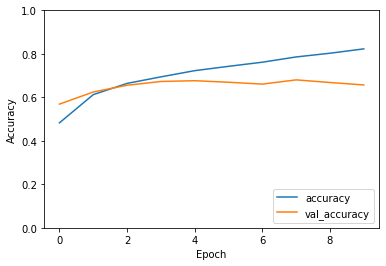

In [33]:
# Plot accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [34]:
# Make predictions on the test set
y_pred = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [35]:
# Visualizing a few test images with predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

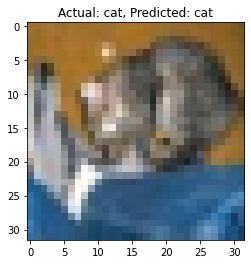

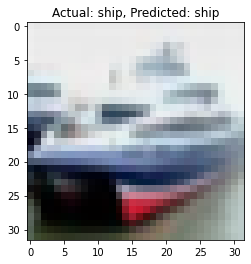

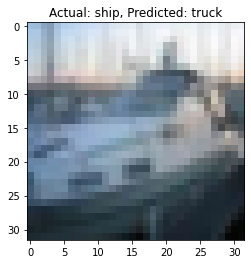

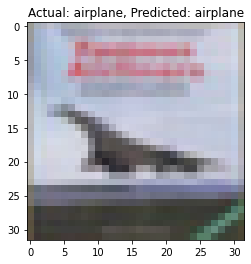

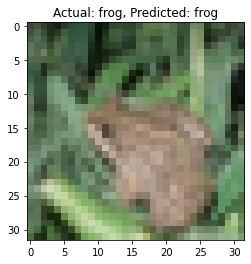

In [18]:
# Displaying the first 5 images and their predicted labels
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Actual: {class_names[np.argmax(y_test[i])]}, Predicted: {class_names[np.argmax(y_pred[i])]}")
    plt.show()